<a href="https://colab.research.google.com/github/sauravsb99/Malayalam-Word-Prediction/blob/master/Malyalam_Language_Model_ULMFiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install sentencepiece


     |████████████████████████████████| 1.1MB 6.5MB/s 


In [21]:
!pip install fastprogress==0.1.22

  Found existing installation: fastprogress 0.2.3
    Uninstalling fastprogress-0.2.3:
      Successfully uninstalled fastprogress-0.2.3


In [3]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [5]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.5.1+cu101')

In [6]:
import multiprocessing as mp

class Foo():
    @staticmethod
    def work(self):
        pass

if __name__ == '__main__':   
    pool = mp.Pool()
    foo = Foo()
    pool.apply_async(foo.work)
    pool.close()
    pool.join()

In [ ]:
# torch.cuda.set_device(0)

In [ ]:
!pwd

/content


In [ ]:
path = Path('/home/sauravsb99/MalWorPre/nlp-for-malyalam/language-model')

In [6]:
!pip install inltk


     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 235kB 15.4MB/s 
     |████████████████████████████████| 1.2MB 19.8MB/s 
     |████████████████████████████████| 266kB 16.1MB/s 
     |████████████████████████████████| 153kB 30.7MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26309 sha256=a525233b592c038c3dd354c7047d5cad79c1cfb8d094a4e3f46d4e2e2ab728ef
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=f67b8c15eb0ae5488bebaba9aa8d24f804db0ba99bde43d41725443e605d8f96
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built typing idna-ssl
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [7]:
from inltk.tokenizer import MalyalamTokenizer

In [8]:
MalyalamTokenizer

inltk.tokenizer.MalyalamTokenizer

In [ ]:
# class MalyalamTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [14]:
!cp "/content/drive/My Drive/Dataset/malyalam_lm.model" "/content/"

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str("/content/malyalam_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(10000)]

In [10]:
# 10,000 is the vocab size that we chose in sentencepiece
malyalam_vocab = Vocab(itos)

In [11]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [12]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
dataset_file_dict = files.upload()

Saving MalayalamDataset.zip to MalayalamDataset.zip


In [11]:
!cp "/content/drive/My Drive/Dataset/MalayalamDataset.zip" "/content/" 


In [12]:
# zip_path = '/content/drive/My Drive/Dataset/MalayalamDataset.zip'
# !cp “{zip_path}” .
!unzip -q MalayalamDataset.zip
# !rm MalayalamDataset.zip

In [8]:
from inltk.inltk import setup

setup('ml')

RuntimeError: ignored

We'll only do this for the first time.


In [13]:
data_lm = TextLMDataBunch.from_folder(path='/content/MalayalamDataset', tokenizer=tokenizer, vocab=malyalam_vocab)


In [14]:
data_lm.batch_size

64

In [15]:
data_lm.save()

In [16]:
data_lm.show_batch()

idx,text
0,"▁താ ലു ക്കിൽ , ▁കോട്ട പ്പ ടി ▁പഞ്ചായത്ത ിൽ ▁മൂ ന്തു ർ ▁എന്ന ▁സ്ഥല ത്തുള്ള ▁ശിവക്ഷേത്ര മാണ് ▁ന ന്ത നാർ ▁ക്ഷേത്രം . ▁ശിവ ▁പ്രതിഷ്ഠ ക്കൊപ്പം ▁ഭക്ത ന ന്ത നാ രുടെ ▁പ്രതിഷ്ഠ യും ▁ഉള്ള ▁കേരളത്തിലെ ▁അപൂർവ്വ ം ▁ക്ഷേത്ര ങ്ങളിൽ ▁ഒന്നാണ് ▁ഇത് . ▁അമ്പ തി യ ൊന്നു ▁പടി കൾ ▁കയറി വേ ണം ▁നട <unk> ▁എത്ത ാൻ . ▁മലയാളം ▁മാസം ▁ഒന്നാം തി യ തി കളിൽ ▁രാവിലെ ▁പ്രത്യേക ▁പൂജ കൾ ▁നടത്തിവരുന്നു . ▁കൂടാതെ ▁എല്ലാ"
1,▁ചെയ്തു . ▁ഗ ത്യ ന്ത ര മില്ലാതെ ▁അലി ▁മുആവിയ യുടെ ▁സൈന്യ വുമായി ▁സന്ധി ▁ചെയ്യാൻ ▁തീരുമാനിച്ചു . ▁എന്നാൽ ▁ഈ ▁തീരുമാന ം ▁അലിയുടെ ▁തന്നെ ▁അനുയായികള ിൽ ▁ചില രുടെ ▁കടുത്ത ▁എതിർപ്പ ിനി ട യാക്കി . ▁തീവ്രവാദ ികളായ ▁ഇവര ിൽ ▁ചിലർ ചേർന്ന് ▁അലി യെ ▁കൊല പ്പെടുത്തി . ▁കിട്ടിയ ▁അവസരം ▁പാ ഴ ാ ക്കാതെ ▁മുആവിയ ▁സ്വയം ▁ഖലീഫ യായി ▁അവ രോധ ിച്ചു . ▁ഖലീഫ ▁സ്ഥാന ത്തിന ർ ഹ നായ ▁അലിയുടെ ▁മൂത്ത ▁പുത്രൻ ▁ഹ സ്സ ന് ▁പെൻഷൻ
2,ത ൽ ▁അതിവേഗ പാത ▁ഉപയോഗ ് ഗ ിക്കുന്ന ▁വാഹന ങ്ങൾക്ക് ▁ചു ങ്ക ം ▁നിരക്ക ിൽ ▁ഇള വ ുകൾ ▁അനുവദിച്ച ിട്ടുണ്ട് . ▁ x x bo s ▁തോ ക്ക ുകളുടെ ▁മുന്നിൽ ▁ഘടിപ്പിക്ക ുന്ന ▁കത്തി യാണ് ▁ബ യ ണ റ്റ് ▁എന്ന റിയപ്പെടുന്നത് . ▁തോ ക്ക ിനെ ▁അടിസ്ഥാന പരമായി ▁ഒരു ▁കു ന്ത മാക്കി ▁ഉപയോഗിക്ക ാനാണ് ▁ബ യ ണ റ്റ് ▁ഘടിപ്പിക്ക ുന്നത് . ▁വെടി യു ണ്ട യുടെ ▁ദ ൗ ർ ല ഭ്യ മോ ▁തൊട്ടടുത്ത
3,ായ പ്പോൾ ▁അയാൾ ക്ക് ▁സഹ താ പ ം ▁തോന്ന ുകയും ▁ക്രമേണ ▁പ്രണയ മായി ▁മാറുകയും ▁ചെയ്തു . അ യാൾ ക്ക് ▁ഒരിക്കൽ ▁അന ധി കൃത മായി ▁ജോലി ▁ചെയ്യുന്ന ▁ അഫ്ഗാൻ കാര െ ▁പിടികൂട ാൻ ▁വന്ന ▁ഇറാനിയൻ ▁ഉദ്യോഗസ്ഥര ിൽ ▁അവളെ ▁രക്ഷിക്ക ാൻ ▁സാധിക്ക ുകയും ▁ചെയ്തു . ▁ഇ തിനുശേഷം ▁ബ റ ാൻ ▁ജോലി സ്ഥല ം ▁മാറ്റ ുകയും ▁ചെയ്തു . എന്നാൽ ▁ല തീ ഫ് ▁പല ▁സ്ഥല ങ്ങളിലും ▁അവളെ ▁അന്വേഷിച്ച ് ▁നടന്നു . ഒരു ▁പുഴ യുടെ
4,"ാണ് . ▁മുഗൾ കാല ▁കെട്ടിട ങ്ങൾ ▁അടങ്ങുന്ന ▁തെക്കുകിഴക്ക േ ▁മൂല , ▁ആർ ക്കിയ ോളജി ക്കൽ ▁സർവ േ ▁ഓഫ് ▁ഇന്ത്യയുടെ ▁കൈവശ മാണ് . ▁ഈ ▁ഭാഗം ▁സന്ദർശക ർ ക്കായി ▁തുറന്നു കൊടുത്ത ിട്ടു മുണ്ട് . ▁ 94 - ac re ▁വിസ്തൃതി യുള്ള ▁ആഗ്ര ▁കോട്ട , ▁ഏതാണ്ട് ▁അർദ്ധ വൃത്ത ാകൃതി യിലാണ് . ▁കിഴക്കു വശത്ത ് ▁അർദ്ധ വൃത്ത ത്തിന്റെ ▁ഞാ ൺ ▁ഭാഗം , ▁യമുന ാ നദി ക്ക് ▁സമാന്തര മായി ▁സ്ഥിതി ▁ചെയ്യുന്നു . ▁ഇരട്ട ഭി ത്തി"


In [17]:
len(data_lm.vocab.itos)

10000

In [ ]:
!pip install -q git+https://github.com/fastai/fastprogress --upgrade
!pip install -q git+https://github.com/fastai/fastcore --upgrade
!pip install -q git+https://github.com/fastai/fastai2 --upgrade

In [ ]:
!pip install --upgrade --user prompt_toolkit==2.0.10

     |████████████████████████████████| 348kB 2.8MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.10 which is incompatible.


In [29]:
!pip uninstall fastprogress

Uninstalling fastprogress-0.2.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/fastprogress-0.2.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/fastprogress/*
Proceed (y/n)? y
  Successfully uninstalled fastprogress-0.2.3


In [18]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

A new version of the model is available.


In [19]:
gc.collect()

0

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


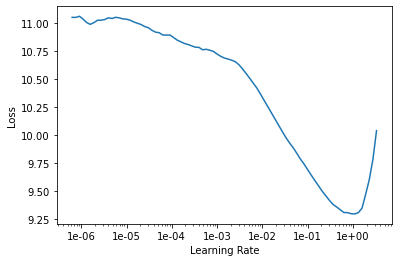

In [ ]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.320145,5.169722,0.207704,03:54


In [22]:
learn.save('first', with_opt=True)

In [23]:
learn.load('first', with_opt=True);

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.616034,4.716401,0.242920,04:53
1,4.292662,4.435427,0.272956,04:57
2,3.994890,4.039202,0.321016,04:57
3,3.547452,3.656352,0.374645,04:57
4,3.153727,3.555925,0.392381,04:57


In [26]:
learn.save('second_ml_lm', with_opt=True)

In [27]:
learn.load('second_ml_lm', with_opt=True);

In [ ]:
learn.fit_one_cycle(40, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.save('third_ml_lm', with_opt=True)

In [ ]:
learn.load('third_ml_lm', with_opt=True);

RuntimeError: Error(s) in loading state_dict for SequentialRNN:
	size mismatch for 0.rnns.0.weight_hh_l0_raw: copying a param with shape torch.Size([4600, 1150]) from checkpoint, the shape in current model is torch.Size([4608, 1152]).
	size mismatch for 0.rnns.0.module.weight_ih_l0: copying a param with shape torch.Size([4600, 400]) from checkpoint, the shape in current model is torch.Size([4608, 400]).
	size mismatch for 0.rnns.0.module.weight_hh_l0: copying a param with shape torch.Size([4600, 1150]) from checkpoint, the shape in current model is torch.Size([4608, 1152]).
	size mismatch for 0.rnns.0.module.bias_ih_l0: copying a param with shape torch.Size([4600]) from checkpoint, the shape in current model is torch.Size([4608]).
	size mismatch for 0.rnns.0.module.bias_hh_l0: copying a param with shape torch.Size([4600]) from checkpoint, the shape in current model is torch.Size([4608]).
	size mismatch for 0.rnns.1.weight_hh_l0_raw: copying a param with shape torch.Size([4600, 1150]) from checkpoint, the shape in current model is torch.Size([4608, 1152]).
	size mismatch for 0.rnns.1.module.weight_ih_l0: copying a param with shape torch.Size([4600, 1150]) from checkpoint, the shape in current model is torch.Size([4608, 1152]).
	size mismatch for 0.rnns.1.module.weight_hh_l0: copying a param with shape torch.Size([4600, 1150]) from checkpoint, the shape in current model is torch.Size([4608, 1152]).
	size mismatch for 0.rnns.1.module.bias_ih_l0: copying a param with shape torch.Size([4600]) from checkpoint, the shape in current model is torch.Size([4608]).
	size mismatch for 0.rnns.1.module.bias_hh_l0: copying a param with shape torch.Size([4600]) from checkpoint, the shape in current model is torch.Size([4608]).
	size mismatch for 0.rnns.2.module.weight_ih_l0: copying a param with shape torch.Size([1600, 1150]) from checkpoint, the shape in current model is torch.Size([1600, 1152]).

In [28]:
TEXT = "ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി"
N_WORDS = 40
N_SENTENCES = 2

In [29]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ക്ക് ▁നേരിട്ട് ▁നിയന്ത്രണ ▁വിധേയമാക്ക ിയ ▁ഒരു ▁നിയമ മാണ് ▁വായ്പ ാ ▁അംഗ ം . ▁ x x bo s ▁നിലവിൽ ▁പുറത്തിറങ്ങിയ ▁ഒരു ▁മലയാളചലച്ചിത്ര മാണ് ▁ന മു ക്കു . ▁18 74 - ൽ ▁പുറത്തിറങ്ങിയ ▁ഈ ▁ചിത്രം ▁മൂന്ന ാ മ തായി ാം ▁എന്ന
ബംഗാളിലെ ▁ഭരണം ▁കമ്പനി ക്ക് ▁എതിര െ ▁പോരാട ിയ ിരുന്ന ▁ഒരു ▁വില്ലേജാണ് ▁ഫ ത്തേ പ്പൂർ ▁ഹെ ലി കൊ ല്ല . ▁ഇന്ത്യയിലെ ▁മുസ്ലിം കളുടെ ▁ശത്രുക്കള ുടെ ▁ഒരു ▁കൂട്ട ം ▁ഗ ൗ ണി കൾ ക്കാണ് ▁ഈ ▁പേര് ▁നൽകിയത് . ▁ഇന്ത്യ യും ▁ഇന്ത്യൻ ▁ഉപഭൂഖണ്ഡ ത്തിന്റെ യും ▁അതിർത്തി


In [ ]:
np.exp(3.273)

26.39039188081262

In [ ]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [ ]:
# Generating embedding vectors for visualization

In [ ]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model')

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
learn = load_learner(path / 'MalyalamDataset/')

In [ ]:
encoder = get_model(learn.model)[0]

In [ ]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([10000, 400])

In [ ]:
embeddings = encoder.state_dict()['encoder.weight']

In [ ]:
embeddings = np.array(embeddings)

In [ ]:
embeddings[0].shape

(400,)

In [ ]:
df = pd.DataFrame(embeddings)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.291967,-0.002322,-0.209247,-0.458362,-0.211871,0.525119,0.216968,0.683054,-0.000421,-0.451211,...,-0.018488,-0.209655,0.576393,0.742110,0.626956,-0.273615,-0.226769,-0.459669,-0.138513,0.613912
1,-0.273549,0.049740,-1.247350,-1.372303,0.257762,-0.763619,-0.482961,0.171256,0.684894,0.376489,...,0.547570,0.743707,0.798664,-0.216511,-0.258916,-0.239699,-0.022576,0.593854,0.076901,-0.260444
2,-0.230950,0.072833,-1.153181,-1.288029,0.275702,-0.715835,-0.478983,0.099732,0.692943,0.347465,...,0.525808,0.640240,0.775471,-0.225178,-0.279536,-0.167131,-0.010020,0.608966,0.082256,-0.256163
3,1.527329,-0.199170,0.261630,-0.411390,0.225107,-0.032793,0.307198,0.282542,-0.511452,-0.663876,...,-0.942614,0.064960,0.044630,0.406766,0.304243,-0.106900,-0.311188,1.198795,-0.061395,-0.982869
4,-0.253548,-0.032533,-0.413230,0.201865,0.209467,0.416606,1.055918,-0.190680,0.999718,-0.150951,...,0.035856,0.736521,0.932499,0.811180,0.393260,-0.127388,0.585211,0.252797,0.105065,0.084277


In [ ]:
df.shape

(10000, 400)

In [ ]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [ ]:
df2 = pd.DataFrame(itos)

In [ ]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,്


In [ ]:
df2.shape

(10000, 1)

In [ ]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [ ]:
encoder.state_dict()['encoder.weight'][1]

tensor([-2.7355e-01,  4.9740e-02, -1.2474e+00, -1.3723e+00,  2.5776e-01,
        -7.6362e-01, -4.8296e-01,  1.7126e-01,  6.8489e-01,  3.7649e-01,
         1.2907e-01,  1.1018e-01,  5.1568e-01,  7.9365e-02, -1.9693e-01,
         1.5606e+00,  1.3909e-01,  4.4212e-01,  2.8622e-01,  1.9001e-01,
         4.1099e-01,  1.1254e+00, -2.0873e-01, -7.7392e-02,  5.6829e-01,
         3.9020e-01,  6.2949e-01,  1.7590e-01,  3.3018e-01,  2.8685e-01,
        -7.7555e-01,  3.0622e-01,  1.7872e-01,  9.3845e-01,  4.2830e-02,
        -8.5402e-02, -5.2553e-01,  4.3522e-01,  2.7174e-01, -1.2583e-01,
         4.8475e-01, -3.7728e-01, -3.6608e-01,  5.4688e-01,  2.1373e-01,
        -5.6125e-01, -2.7174e-01, -9.3416e-01,  2.4786e-01, -5.0529e-01,
        -3.4035e-01, -2.1120e-01,  3.7982e-02, -1.2824e-01, -3.4154e-01,
         8.7507e-01,  4.3182e-01,  3.1867e-01, -1.1197e+00, -1.2728e-01,
         9.6618e-01, -7.5389e-02, -3.4188e-01,  2.2546e-01,  1.7317e-01,
         1.4208e+00,  1.1709e-01, -1.9090e-02, -4.0